In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Exploratory Data Analysis (EDA) - Superstore Dataset

This analysis explores the Superstore sales dataset to understand sales performance, product categories, customer behavior, and profitability trends.

In [3]:
df = pd.read_csv("Sample - Superstore.csv", encoding="latin1")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Data Loading

The dataset was successfully loaded. Each row represents a sales transaction including order details, customer information, product category, sales, quantity, and profit.

In [18]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [19]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
Month                 period[M]
dtype: object

## Data Overview

The dataset contains both categorical and numerical variables.

Numerical variables include:
- Sales
- Quantity
- Discount
- Profit

Categorical variables include:
- Category
- Sub-Category
- Customer Name
- Region
- State

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [8]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [17]:
df.duplicated().sum()

np.int64(0)

In [9]:
df = df.drop_duplicates()

## Data Cleaning

The date columns were converted to datetime format.

Missing values were checked and handled if necessary.

Duplicate records were removed to ensure data quality.

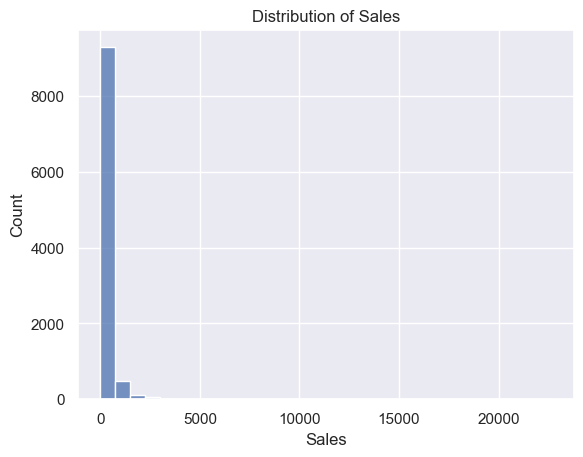

In [10]:
sns.histplot(df['Sales'], bins=30)
plt.title("Distribution of Sales")
plt.show()

### Distribution of Sales

Sales distribution is right-skewed. Most transactions have relatively small sales amounts, while a few transactions generate very high revenue.

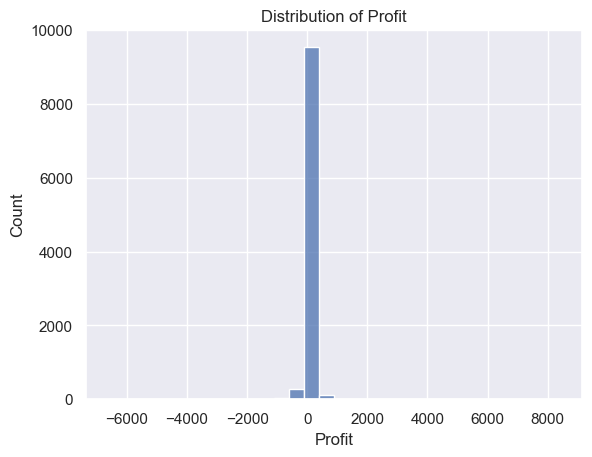

In [11]:
sns.histplot(df['Profit'], bins=30)
plt.title("Distribution of Profit")
plt.show()

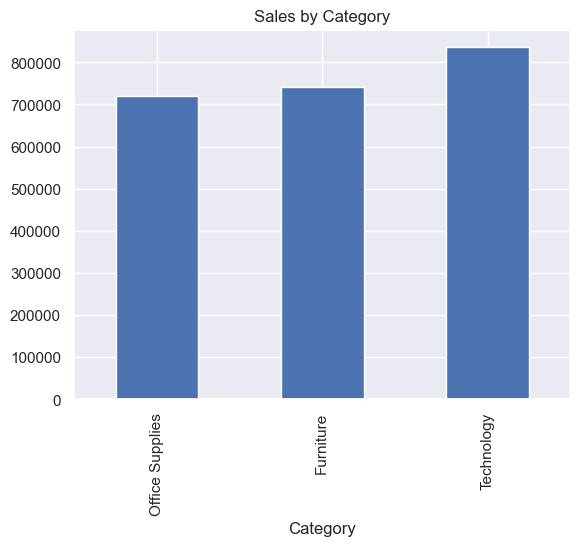

In [12]:
df.groupby('Category')['Sales'].sum().sort_values().plot(kind='bar')
plt.title("Sales by Category")
plt.show()

### Sales by Category

Sales vary across product categories. Some categories contribute significantly more to total revenue.

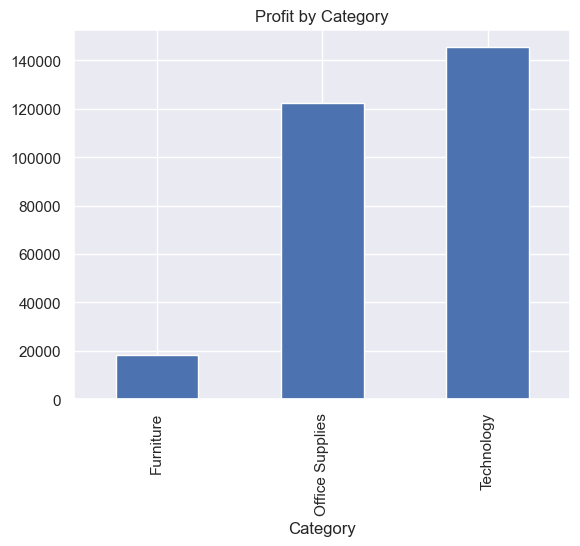

In [13]:
df.groupby('Category')['Profit'].sum().sort_values().plot(kind='bar')
plt.title("Profit by Category")
plt.show()

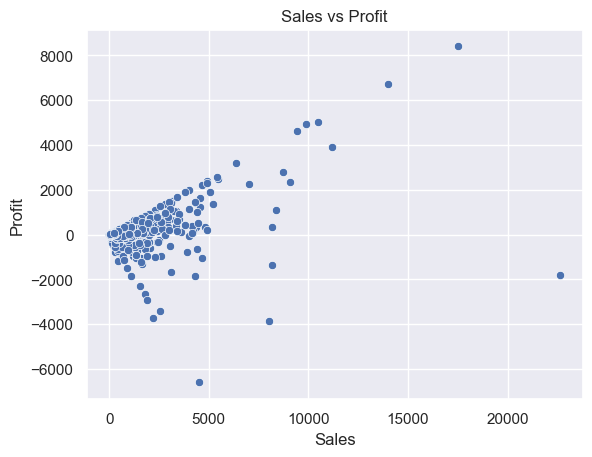

In [14]:
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title("Sales vs Profit")
plt.show()

### Sales vs Profit Relationship

There is a positive relationship between sales and profit, although some high-sales transactions may result in low or negative profit due to discounts.

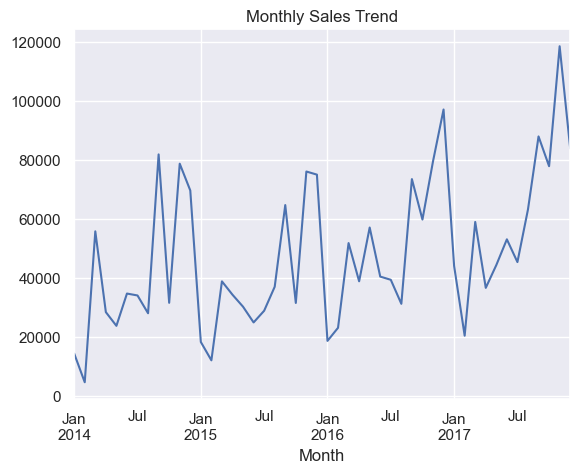

In [15]:
df['Month'] = df['Order Date'].dt.to_period('M')
df.groupby('Month')['Sales'].sum().plot()
plt.title("Monthly Sales Trend")
plt.show()

### Monthly Sales Trend

Sales fluctuate over time, showing potential seasonal patterns and business growth trends.

# Final Conclusion

This exploratory data analysis of the Superstore dataset revealed important insights:

- Sales distribution is highly skewed with a few large transactions.
- Product categories contribute differently to revenue and profit.
- There is a general positive relationship between sales and profit.
- Sales trends vary over time, indicating possible seasonality.
- No missing values or duplicate records were found.

These findings can help improve business strategy, pricing decisions, and future forecasting.